In [1]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from matplotlib import pyplot as plt

In [2]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:]
optimizer = optimizers.Adam(learning_rate=0.001)

In [7]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

In [8]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

(32, 32, 3)


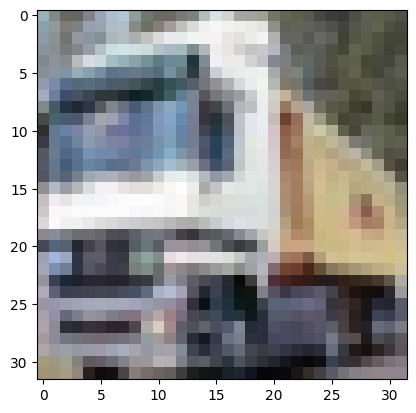

In [9]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [11]:
from keras.layers import BatchNormalization
# Build model (modified VGG-like with BatchNormalization and Dropout)
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Dropout added
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Dropout added
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Dropout added
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Dropout added
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Dropout added
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # Dropout added
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # Dropout added
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [12]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
# check model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                      

In [23]:
# train
history = model.fit(x=x_train, y=one_hot_y_train, batch_size=128, epochs=30, validation_split=0.1)

# Train
# history = model.fit(x=x_train, y=one_hot_y_train, batch_size=128, epochs=30, validation_split=0.1)


Epoch 1/30
352/352 [==============================] - 31s 88ms/step - loss: 0.3996 - accuracy: 0.8696 - val_loss: 0.2807 - val_accuracy: 0.9040
Epoch 2/30
352/352 [==============================] - 29s 81ms/step - loss: 0.3370 - accuracy: 0.8943 - val_loss: 0.4476 - val_accuracy: 0.8492
Epoch 3/30
352/352 [==============================] - 28s 80ms/step - loss: 0.2943 - accuracy: 0.9050 - val_loss: 0.5567 - val_accuracy: 0.8138
Epoch 4/30
352/352 [==============================] - 29s 83ms/step - loss: 0.3370 - accuracy: 0.9054 - val_loss: 0.2111 - val_accuracy: 0.9288
Epoch 5/30
352/352 [==============================] - 29s 83ms/step - loss: 0.1634 - accuracy: 0.9470 - val_loss: 0.2460 - val_accuracy: 0.9266
Epoch 6/30
352/352 [==============================] - 29s 83ms/step - loss: 0.1639 - accuracy: 0.9466 - val_loss: 0.5676 - val_accuracy: 0.8202
Epoch 7/30
352/352 [==============================] - 29s 82ms/step - loss: 0.2200 - accuracy: 0.9307 - val_loss: 0.5889 - val_accuracy:

In [25]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 1s 59ms/step - loss: 0.9053 - accuracy: 0.7725


[0.9053430557250977, 0.7724999785423279]

1/1 [==============================] - 0s 18ms/step
predict class: 5
expected class: 5


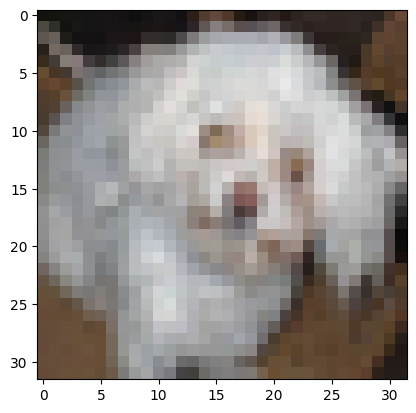

In [26]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

313/313 [==============================] - 2s 7ms/step


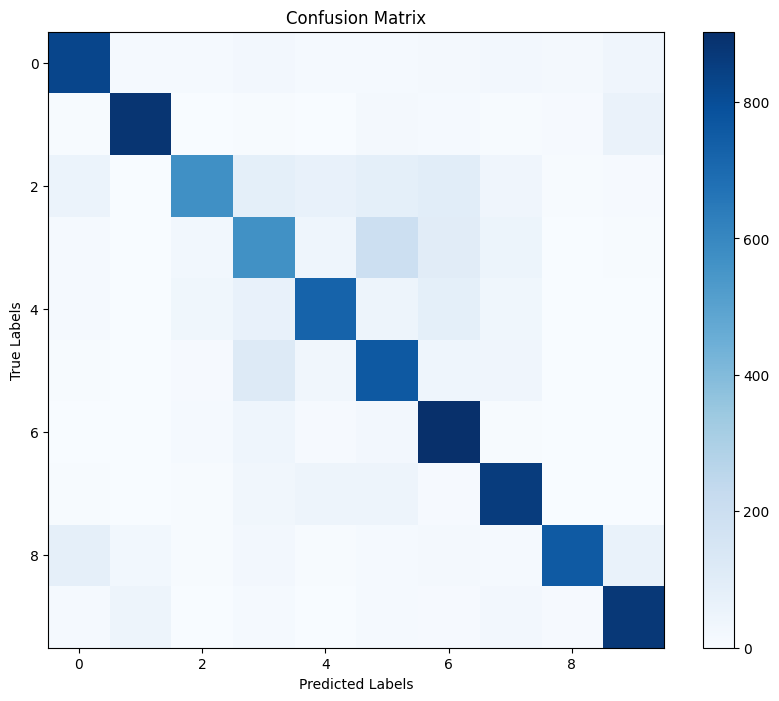

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


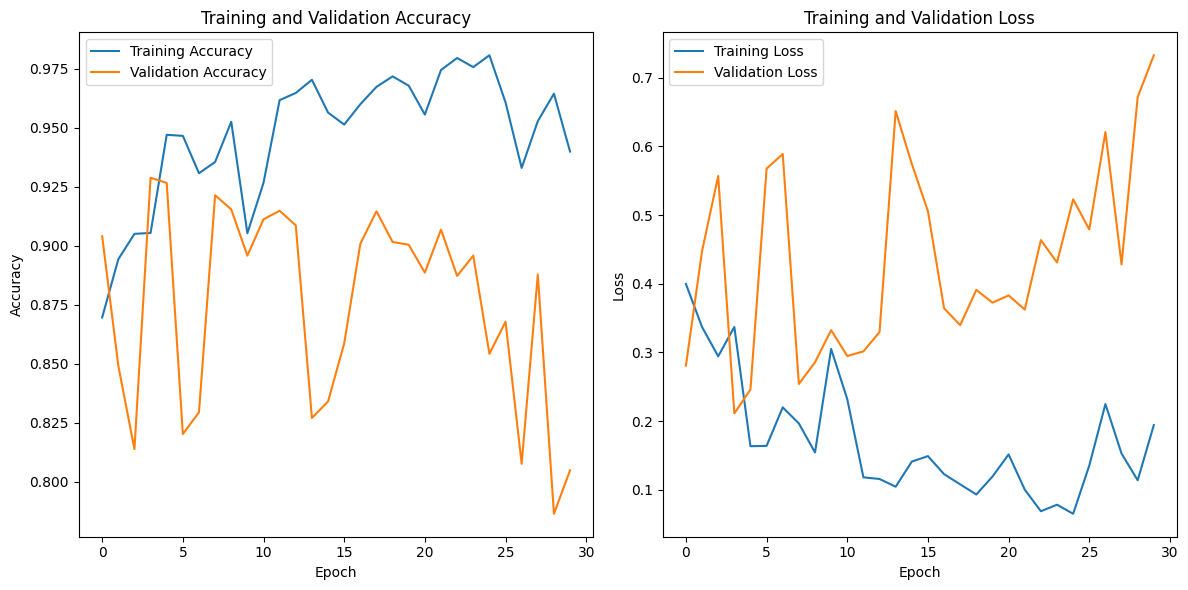

In [28]:
# Plot training and testing loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

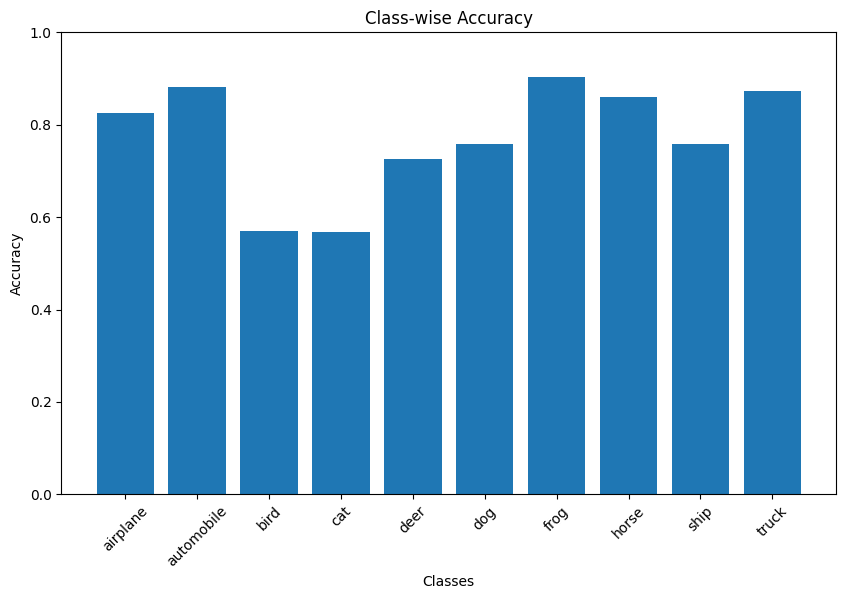

In [29]:
# Class-wise Accuracy Plot
class_accuracy = cm.diagonal() / cm.sum(axis=1)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [12]:
# save model
model.save("keras-VGG16-cifar10.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
